In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
cat_data = "../../Alerce/ZTF_data/AGN_QSO_Blazar_info.csv"
features_file = '../../Alerce/ZTF_data/features_20200109_with_WISE.csv'

candidates_file = '../../Alerce/ZTF_classifications/classes_TS_v5.1_new_features_with_WISE_20200110.csv'
photoz_file = '../../Alerce/ZTF_classifications/classes_TS_v5.1_with_WISE_20200110_with_ra_dec_withSDSS_photoz.csv'



df_feat = pd.read_csv(features_file,index_col='oid')
df_labels = pd.read_csv(cat_data,index_col='oid')

df_cand = pd.read_csv(candidates_file,index_col='oid')
df_photoz = pd.read_csv(photoz_file,index_col='oid')

In [3]:
datos = df_labels.join(df_feat,on='oid',how='left')

print(datos.head())

             classALeRCE          ra        dec        period  source  \
oid                                                                     
ZTF18acpavdw         AGN  131.397862  27.153660           NaN  Oh2015   
ZTF18abueqkq         AGN  338.410103  13.212115           NaN  Oh2015   
ZTF18aaqjvgc         AGN  199.517994  41.292966           NaN  Oh2015   
ZTF18aarippg         AGN  217.566870  23.062359  NON PERIODIC  Oh2015   
ZTF18accdwbg         AGN  164.666393  37.803914           NaN  Oh2015   

                          id_source          class_source  separation_arcsec  \
oid                                                                            
ZTF18acpavdw  5.880179794098913e+17  AGN_galaxy_dominated           0.284352   
ZTF18abueqkq  5.877307738795542e+17  AGN_galaxy_dominated           0.042559   
ZTF18aaqjvgc  5.880177206497773e+17  AGN_galaxy_dominated           0.053721   
ZTF18aarippg  5.877398099516458e+17  AGN_galaxy_dominated           0.149592   
ZTF18acc

In [4]:
AGN_A = datos[datos["classALeRCE"] == "AGN"]
AGN_P = datos[(datos["predicted_class"] == "AGN") & (datos["classALeRCE"] == "AGN") ]

Bla_A = datos[(datos["classALeRCE"] == "Blazar")  ]
Bla_P = datos[(datos["predicted_class"] == "Blazar") & (datos["classALeRCE"] == "Blazar")]

QSO_A = datos[datos["classALeRCE"] == "QSO"]
QSO_P = datos[(datos["predicted_class"] == "QSO") & (datos["classALeRCE"] == "QSO")]

QSO_as_AGN = datos[(datos["predicted_class"] == "AGN") & ((datos["classALeRCE"] == "QSO"))]

print(QSO_as_AGN)


             classALeRCE          ra        dec period     source  \
oid                                                                 
ZTF19aalcrfr         QSO  271.177320  17.932975    NaN  MILLIQUAS   
ZTF18aawolfd         QSO  180.641947  27.940551    NaN  MILLIQUAS   
ZTF18aaaqhmp         QSO  188.508630  37.927462    NaN  MILLIQUAS   
ZTF18aajbdyg         QSO  235.760256  36.913696    NaN  MILLIQUAS   
ZTF18aaysnzk         QSO  240.795833  43.491403    NaN  MILLIQUAS   
ZTF18abolwbb         QSO  344.710821   8.240664    NaN  MILLIQUAS   
ZTF18accdrdw         QSO  148.257912  44.504647    NaN  MILLIQUAS   
ZTF18acdxucw         QSO    4.591757   1.317228    NaN  MILLIQUAS   
ZTF19aatyotw         QSO  235.693823  19.773950    NaN  MILLIQUAS   
ZTF19abewcfn         QSO  239.496897  29.338714    NaN  MILLIQUAS   
ZTF18aalsudf         QSO  231.883695  43.567034    NaN  MILLIQUAS   
ZTF18aauuhyo         QSO  222.561553  62.782493    NaN  MILLIQUAS   
ZTF18aceyygx         QSO  191.8137

Para AGN:

[0.   0.15 0.3  0.45 0.6  0.75 0.9  1.05 1.2  1.35 1.5  1.65 1.8  1.95
 2.1  2.25 2.4  2.55 2.7  2.85 3.   3.15 3.3  3.45]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


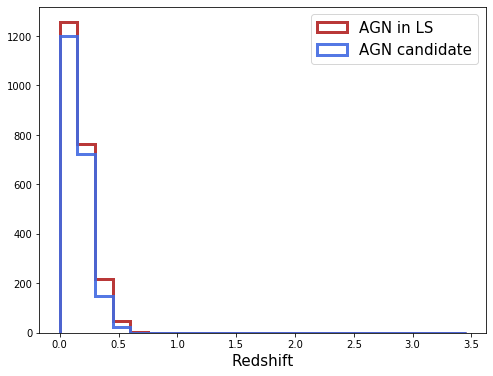

In [5]:
fig, ax = plt.subplots(figsize = (8,6)) 

bins = np.arange(0,3.5,0.15)
print(bins)

plt.hist(AGN_A["redshift"].dropna().values, normed = False, bins = bins, histtype='step', lw=3, color = "firebrick", label = "AGN in LS", alpha=0.9);
plt.hist(AGN_P["redshift"].dropna().values, normed = False, bins = bins, histtype='step', lw=3, color = "royalblue", label = "AGN candidate", alpha=0.9);
plt.xlabel("Redshift", fontsize = 15)
#plt.ylabel("Density", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Para Blazar:

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


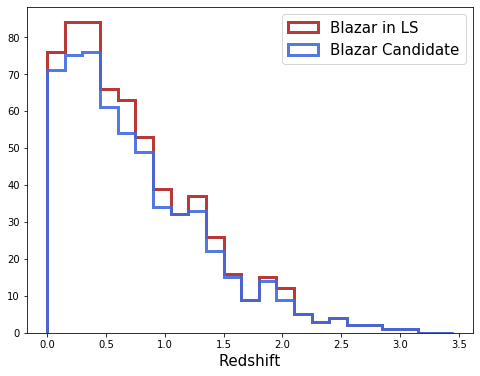

In [6]:
fig, ax = plt.subplots(figsize = (8,6)) 
plt.hist(Bla_A["redshift"].dropna().values, normed = False, bins = bins, lw=3, histtype='step', color = "firebrick", label = "Blazar in LS", alpha=0.9);
plt.hist(Bla_P["redshift"].dropna().values, normed = False, bins = bins, lw=3, histtype='step', color = "royalblue", label = "Blazar Candidate", alpha=0.9);
plt.xlabel("Redshift", fontsize = 15)
#plt.ylabel("Density", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Para QSO:

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


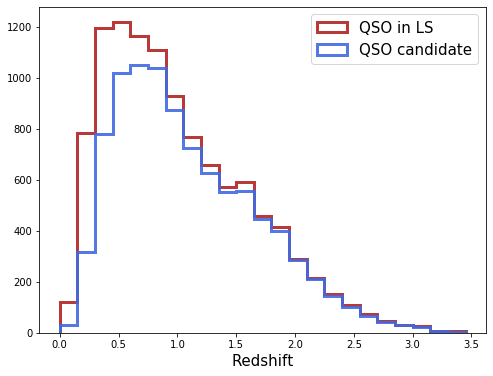

In [7]:
fig, ax = plt.subplots(figsize = (8,6)) 
plt.hist(QSO_A["redshift"].dropna().values, normed = False, bins = bins, lw=3, histtype='step', color = "firebrick", label = "QSO in LS", alpha=0.9);
plt.hist(QSO_P["redshift"].dropna().values, normed = False, bins = bins, lw=3, histtype='step', color = "royalblue", label = "QSO candidate", alpha=0.9);
plt.xlabel("Redshift", fontsize = 15)
#plt.ylabel("Density", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 

[0.   0.15 0.3  0.45 0.6  0.75 0.9  1.05 1.2  1.35 1.5  1.65 1.8  1.95
 2.1  2.25 2.4  2.55 2.7  2.85 3.   3.15 3.3  3.45]


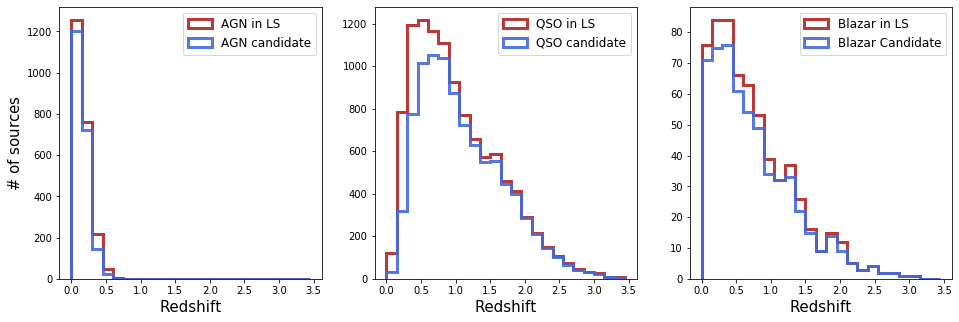

In [8]:
fig, ax = plt.subplots(nrows=1, ncols= 3, figsize = (16,5)) 
bins = np.arange(0,3.5,0.15)
print(bins)

ax[0].hist(AGN_A["redshift"].dropna().values, normed = False, bins = bins, histtype='step', lw=3, color = "firebrick", label = "AGN in LS", alpha=0.9);
ax[0].hist(AGN_P["redshift"].dropna().values, normed = False, bins = bins, histtype='step', lw=3, color = "royalblue", label = "AGN candidate", alpha=0.9);
ax[0].set_xlabel("Redshift", fontsize = 15)
ax[0].set_ylabel(r"$\#$ of sources", fontsize = 15)
ax[0].legend(fontsize = 12)

ax[1].hist(QSO_A["redshift"].dropna().values, normed =False, bins = bins, lw=3, histtype='step', color = "firebrick", label = "QSO in LS", alpha=0.9);
ax[1].hist(QSO_P["redshift"].dropna().values, normed = False, bins = bins, lw=3, histtype='step', color = "royalblue", label = "QSO candidate", alpha=0.9);
ax[1].set_xlabel("Redshift", fontsize = 15)
#ax[1].ylabel("Density", fontsize = 15)
ax[1].legend(fontsize = 12)

ax[2].hist(Bla_A["redshift"].dropna().values, normed = False, bins = bins, lw=3, histtype='step', color = "firebrick", label = "Blazar in LS", alpha=0.9);
ax[2].hist(Bla_P["redshift"].dropna().values, normed = False, bins = bins, lw=3, histtype='step', color = "royalblue", label = "Blazar Candidate", alpha=0.9);
ax[2].set_xlabel("Redshift", fontsize = 15)
#ax[2].set_ylabel("Density", fontsize = 15)
ax[2].legend(fontsize = 12)

plt.savefig('../paper_plots/redshift_dist_AGN_QSO_Blazar.pdf',bbox_inches='tight')

[0.   0.15 0.3  0.45 0.6  0.75 0.9  1.05 1.2  1.35 1.5  1.65 1.8  1.95
 2.1  2.25 2.4  2.55 2.7  2.85 3.   3.15 3.3  3.45]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

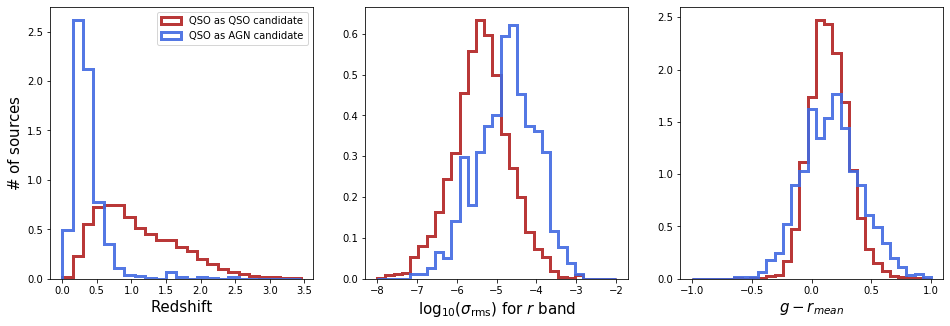

In [9]:
fig, ax = plt.subplots(nrows=1, ncols= 3, figsize = (16,5)) 

print(bins)

bins = np.arange(0,3.5,0.15)
ax[0].hist(QSO_P["redshift"].dropna().values, normed = True, bins = bins, histtype='step', lw=3, color = "firebrick", label = "QSO as QSO candidate", alpha=0.9);
ax[0].hist(QSO_as_AGN["redshift"].dropna().values, normed = True, bins = bins, histtype='step', lw=3, color = "royalblue", label = "QSO as AGN candidate", alpha=0.9);
ax[0].set_xlabel("Redshift", fontsize = 15)
ax[0].set_ylabel(r"$\#$ of sources", fontsize = 15)
ax[0].legend(fontsize = 10)

bins = np.linspace(-8,-2,30)
ax[1].hist(np.log10(QSO_P["ExcessVar_2"].dropna().values), normed =True, bins = bins, lw=3, histtype='step', color = "firebrick", label = "QSO as QSO candidate", alpha=0.9);
ax[1].hist(np.log10(QSO_as_AGN["ExcessVar_2"].dropna().values), normed = True, bins = bins, lw=3, histtype='step', color = "royalblue", label = "QSO as AGN candidate", alpha=0.9);
ax[1].set_xlabel(r"$\mathrm{log}_{10}(\sigma_{\mathrm{rms}})$ for $r$ band", fontsize = 15)
#ax[1].ylabel("Density", fontsize = 15)
#ax[1].legend(fontsize = 10)

bins = np.linspace(-1,1,30)
ax[2].hist(QSO_P["g-r_mean"].dropna().values, normed = True, bins = bins, lw=3, histtype='step', color = "firebrick", label = "Blazar in LS", alpha=0.9);
ax[2].hist(QSO_as_AGN["g-r_mean"].dropna().values, normed = True, bins = bins, lw=3, histtype='step', color = "royalblue", label = "Blazar Candidate", alpha=0.9);
ax[2].set_xlabel(r"$g-r_{mean}$", fontsize = 15)
#ax[2].set_ylabel("Density", fontsize = 15)
#ax[2].legend(fontsize = 10)

plt.savefig('../paper_plots/QSO_as_QSO_or_AGN.pdf',bbox_inches='tight')

## Plots for 4MOST

In [10]:
agn = df_cand[(df_cand.predicted_class=='AGN')]
agn_sdss = df_cand[(df_cand.predicted_class=='AGN') & (df_cand.u>-500) ]
qso = df_cand[df_cand.predicted_class=='QSO']
qso_sdss = df_cand[(df_cand.predicted_class=='QSO') & (df_cand.u>-500) ]


(-2, 3)

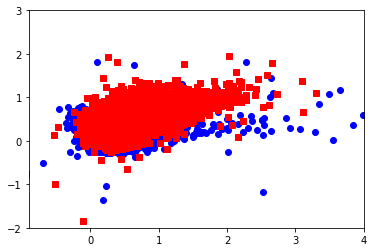

In [11]:
plt.plot(qso_sdss['u_g'].values,qso_sdss['g_r'].values,'bo')
plt.plot(agn_sdss['u_g'].values,agn_sdss['g_r'].values,'rs')
plt.xlim(-0.9,4)
plt.ylim(-2,3)

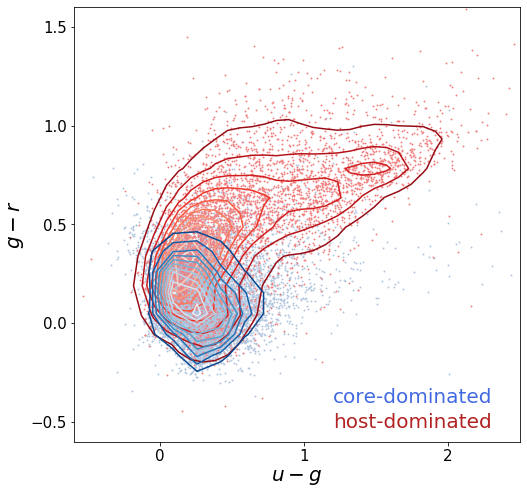

In [12]:
fig, ax = plt.subplots(figsize = (8,8))  
plt.scatter(qso_sdss['u_g'].values,qso_sdss['g_r'].values,c='lightsteelblue',s=0.8)#,alpha=0.3)
plt.scatter(agn_sdss['u_g'].values,agn_sdss['g_r'].values,c='lightcoral',s=0.8)#,alpha=0.3)
ax = sns.kdeplot(agn_sdss['u_g'].values,agn_sdss['g_r'].values, n_levels=10, cmap="Reds_r", shade=False)
ax = sns.kdeplot(qso_sdss['u_g'].values,qso_sdss['g_r'].values, n_levels=10, cmap="Blues_r", shade=False)

plt.text(1.2,-0.53,'host-dominated',color='firebrick', fontsize=20)
plt.text(1.2,-0.4,'core-dominated',color='royalblue', fontsize=20)



plt.xlabel(r'$u-g$',fontsize=20)
plt.ylabel(r'$g-r$',fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=6)
plt.xlim(-0.6,2.5)
plt.ylim(-0.6,1.6)
plt.savefig('../../4MOST/color_color_cand.png')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


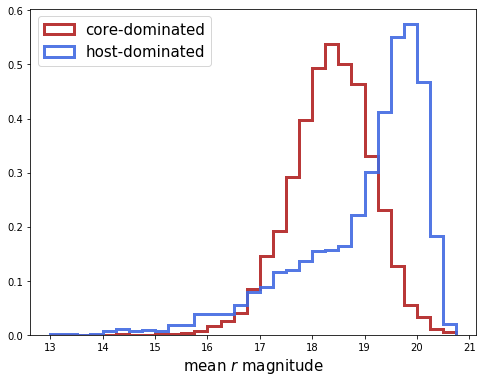

In [21]:
fig, ax = plt.subplots(figsize = (8,6)) 
bins = np.arange(13,21,0.25)
plt.hist(qso['Mean_2'].dropna().values, normed = True, bins = bins, lw=3, histtype='step', color = "firebrick", label = "core-dominated", alpha=0.9);
plt.hist(agn['Mean_2'].dropna().values, normed = True, bins = bins, lw=3, histtype='step', color = "royalblue", label = "host-dominated", alpha=0.9);
plt.xlabel(r"mean $r$ magnitude", fontsize = 15)
#plt.ylabel("Density", fontsize = 15)
plt.legend(fontsize = 15,loc='upper left')
plt.savefig('../../4MOST/mean_r_mag.png')

1454


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


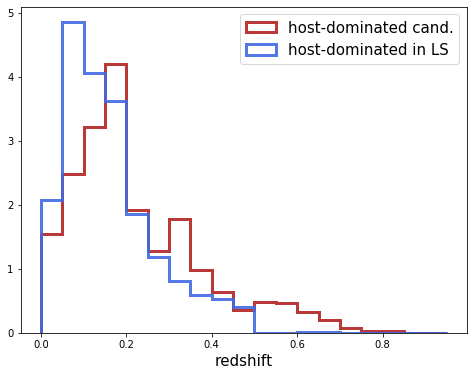

In [22]:
df_photoz_agn = df_photoz[(df_photoz.predicted_class=="AGN") & (df_photoz.redshift>0)]
print(len(df_photoz_agn['redshift'].values))
print(len())

fig, ax = plt.subplots(figsize = (8,6)) 
bins = np.arange(0,1,0.05)
plt.hist(df_photoz_agn['redshift'].dropna().values, normed = True, bins = bins, lw=3, histtype='step', color = "firebrick", label = "host-dominated cand.", alpha=0.9);
plt.hist(AGN_A['redshift'].dropna().values, normed = True, bins = bins, lw=3, histtype='step', color = "royalblue", label = "host-dominated in LS", alpha=0.9);
plt.xlabel(r"redshift", fontsize = 15)
#plt.ylabel("Density", fontsize = 15)
plt.legend(fontsize = 15,loc='upper right')
plt.savefig('../../4MOST/agn_cand_redshift.png')